In [1]:
import osmnx as ox
import geojson
import pandas as pd
import os

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    # Fetch postal code polygons from OSMnx
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    # Create GeoJSON features from the input data
    geojson_features = [geojson.Feature(geometry=polygon, properties={"postal_code": postal_code}) for postal_code, polygon in data.items()]
    
    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    # Determine the script's directory
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    
    # Create the full path for the GeoJSON file
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

# User input for the city or country name
place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)
place_geojson_data = format_geojson_data(place_postal_code_polygons)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {saved_file_path}")


Kassel GeoJSON data saved to c:\Users\Admin\OneDrive\Dokumente\Projects\Retoflow_Filter-1\Check_Out_Leon\Kassel_geojson_data.geojson


Plot Postal Codes Data

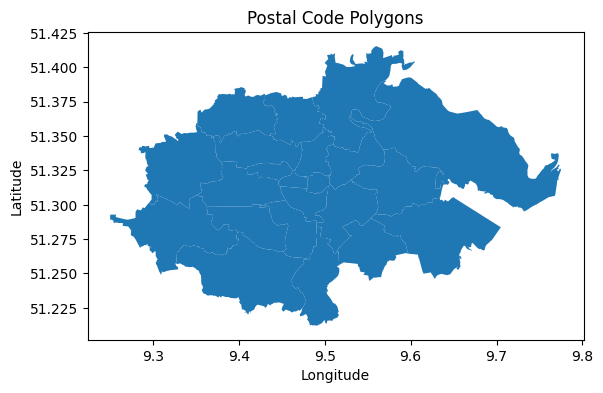

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_geojson_data(geojson_file_path):
    """
    Plots GeoJSON data using GeoPandas.
    """
    # Load GeoJSON data using GeoPandas
    gdf = gpd.read_file(geojson_file_path)

    # Plot GeoDataFrame
    gdf.plot()

    # Display the plot
    plt.title("Postal Code Polygons")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Beispielaufruf der Plot-Funktion
plot_geojson_data(saved_file_path)

Test Function: Find nearest Postal Code, using a Point (Lat,Long)

In [5]:
from shapely.geometry import Point

def get_postal_code_for_point(latitude, longitude, postal_code_polygons):
    """
    Returns the postal code for a point specified by latitude and longitude.
    """
    # Create a Point object for the specified latitude and longitude
    point = Point(longitude, latitude)
    
    # Check each postal code polygon to see if it contains the point
    for postal_code, polygon in postal_code_polygons.items():
        if polygon.contains(point):
            # If the polygon contains the point, return its postal code
            return postal_code
    
    # If no polygon contains the point, return None
    return None


Load Data & Call Function

In [6]:
import json
from shapely.geometry import shape

# Load the GeoJSON data from the file
with open(saved_file_path, 'r') as file:
    geojson_data = json.load(file)

# Convert the GeoJSON data to a dictionary mapping postal codes to polygons
postal_code_polygons = {feature['properties']['postal_code']: shape(feature['geometry']) for feature in geojson_data['features']}

# Now you can use this dictionary with the get_postal_code_for_point function
latitude = 51.316669
longitude = 9.500000
postal_code = get_postal_code_for_point(latitude, longitude, postal_code_polygons)
print(f"The postal code for the point ({latitude}, {longitude}) is: {postal_code}")



The postal code for the point (51.316669, 9.5) is: 34117


Test erfolgreich: Lat,Long sind Kassel's Koordinaten, 34117 ist Kassel Mitte, aka. das Zentrum.

Test Polygon für Postal Code

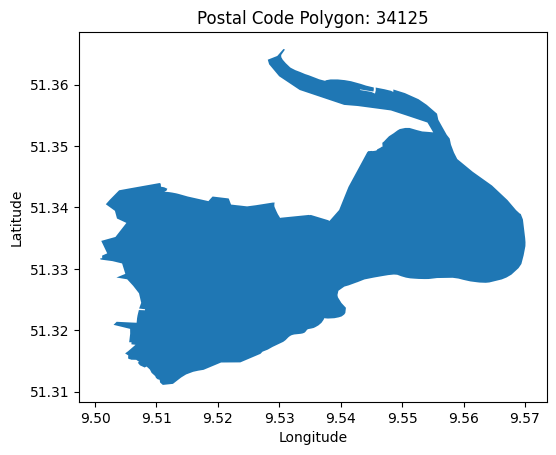

In [12]:
import json
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt

def load_geojson(file_path):
    """
    Loads GeoJSON data from a file and converts it to a dictionary mapping postal codes to polygons.
    """
    with open(file_path, 'r') as file:
        geojson_data = json.load(file)

    postal_code_polygons = {feature['properties']['postal_code']: shape(feature['geometry']) for feature in geojson_data['features']}
    return postal_code_polygons

def plot_polygon(postal_code_polygons, postal_code):
    """
    Plots the polygon for a given postal code.
    """
    polygon = postal_code_polygons.get(postal_code)
    if polygon:
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf.plot()
        plt.title(f"Postal Code Polygon: {postal_code}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    else:
        print(f"No polygon found for postal code: {postal_code}")

# Example usage
file_path = r'C:\Users\Admin\OneDrive\Dokumente\Projects\Retoflow_Filter-1\Check_Out_Leon\Germany_geojson_data.geojson'
postal_code_polygons = load_geojson(file_path)

# Input the postal code you want to plot
input_postal_code = input("Enter a postal code: ")

# Plot the polygon for the specified postal code
plot_polygon(postal_code_polygons, input_postal_code)

